# Pankreopriver diabetes mellitus vs Diabetes Type 1 

## Upsetplot

### Libraries

In [1]:
# pd.options.display.max_columns= 999

In [2]:
import pandas as pd

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.decomposition import PCA

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy.stats import mannwhitneyu
from statsmodels.stats.multitest import multipletests

In [5]:
from skbio.stats.ordination import pcoa

### Data loading

In [6]:
#df = pd.read_csv("/data/projects/2024/Effenberger-Diabetes/data/PDM merged 3.0_modified.csv")
df = pd.read_csv("/data/scratch/kvalem/projects/2024/diabetes_microbe/01-tables/PDM merged 3.0_modified.csv")

In [7]:
#sample_info = pd.read_csv("/data/projects/2024/Effenberger-Diabetes/data/20011/20011_SampleInfo.csv")
sample_info = pd.read_csv("/data/scratch/kvalem/projects/2024/diabetes_microbe/01-tables/20011_SampleInfo.csv")

In [8]:
df.rename(columns={"Probennummer": "sample_information"}, inplace=True)

In [9]:
sample_info.rename(columns={"SampleInformation": "sample_information"}, inplace=True)

In [10]:
df = df.merge(
    sample_info[["sample_information", "IMGM ID", "Type"]],
    on="sample_information",
    how="left",
)

In [11]:
#file_path = "/data/projects/2024/Effenberger-Diabetes/out/nf_core_ampliseq_003/qiime2/barplot/level-6.csv"
file_path = "/data/scratch/kvalem/projects/2024/diabetes_microbe/01-tables/level-6.csv"
df_tax = pd.read_csv(file_path)

### Plot

In [12]:
metadata_cols = [
    "index",
    "sample_information",
    "Type",
    "nikotin",
    "sex",
    "age_group",
    "AH",
]


def extract_microbial_data(df, condition_label):
    subset = df[df["sample_information"].str.startswith(condition_label)]
    microbial_data = subset.drop(columns=metadata_cols, errors="ignore")
    microbial_data = microbial_data.loc[:, (microbial_data != 0).any(axis=0)]
    microbial_data = microbial_data.loc[
        :, ~microbial_data.columns.str.startswith("Archaea;")
    ]
    return microbial_data



microbial_data_PDM = extract_microbial_data(df_tax, "PDM")
microbial_data_DM = extract_microbial_data(df_tax, "DM")
microbial_data_Kontrolle = extract_microbial_data(df_tax, "K")

In [13]:
list_PDM = set(microbial_data_PDM.columns)
list_DM = set(microbial_data_DM.columns)
list_Kontrolle = set(microbial_data_Kontrolle.columns)

In [14]:
common_PDM_DM = list_PDM & list_DM

In [15]:
notcommon_PDM_DM = list_PDM ^ list_DM

# Unique to PDM
unique_PDM = list_PDM - list_DM - list_Kontrolle

# Unique to DM
unique_DM = list_DM - list_PDM - list_Kontrolle

common_PDM_DM = sorted(list(common_PDM_DM))
unique_PDM = sorted(list(unique_PDM))
unique_DM = sorted(list(unique_DM))

In [16]:
metadata_cols = [
    "index",
    "sample_information",
    "Type",
    "nikotin",
    "sex",
    "age_group",
    "AH",
]

microbial_data = df_tax.drop(columns=metadata_cols, errors="ignore")
microbial_data = microbial_data.loc[:, (microbial_data != 0).any(axis=0)]


def extract_microbial_data(df, condition_label):
    subset = df[df["sample_information"].str.startswith(condition_label)]
    microbial_data = subset.drop(columns=metadata_cols, errors="ignore")
    microbial_data = microbial_data.loc[:, (microbial_data != 0).any(axis=0)]
    return microbial_data


microbial_data_PDM = extract_microbial_data(df_tax, "PDM")
microbial_data_DM = extract_microbial_data(df_tax, "DM")

list_PDM = set(microbial_data_PDM.columns)
list_DM = set(microbial_data_DM.columns)

common_PDM_DM = list_PDM - list_DM
common_PDM_DM = sorted(list(common_PDM_DM))

/home/kvalem/.conda/envs/scanpy/lib/python3.12/site-packages/upsetplot/data.py:303: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.fillna(False, inplace=True)
/home/kvalem/.conda/envs/scanpy/lib/python3.12/site-packages/upsetplot/plotting.py:795: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  styles["linewidth

<Figure size 1000x600 with 0 Axes>

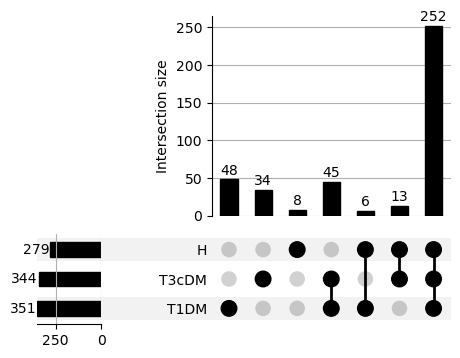

In [17]:
import matplotlib.pyplot as plt
import pandas as pd
from upsetplot import UpSet, from_memberships


taxa_T3cDM = set(microbial_data_PDM.columns)
taxa_T1DM = set(microbial_data_DM.columns)
taxa_H = set(microbial_data_Kontrolle.columns)


taxa_all = taxa_T3cDM | taxa_T1DM | taxa_H


memberships = []
for taxon in taxa_all:
    presence = []
    if taxon in taxa_T3cDM:
        presence.append("T3cDM")
    if taxon in taxa_T1DM:
        presence.append("T1DM")
    if taxon in taxa_H:
        presence.append("H")
    memberships.append(presence)


data = from_memberships(memberships)


plt.figure(figsize=(10, 6))
UpSet(data, subset_size="count", show_counts=True).plot()
plt.title("")
plt.tight_layout()
#plt.savefig("/data/scratch/kvalem/projects/2024/diabetes_microbe/05-results/figures/upsetplot.svg", dpi=300)
#plt.savefig("/data/scratch/kvalem/projects/2024/diabetes_microbe/05-results/figures/upsetplot.png", dpi=300)
plt.show()


shared_T3cDM_T1DM_only = (taxa_T3cDM & taxa_T1DM) - taxa_H
unique_T3cDM = taxa_T3cDM - taxa_T1DM - taxa_H
unique_T1DM = taxa_T1DM - taxa_T3cDM - taxa_H
unique_H = taxa_H - taxa_T1DM - taxa_T3cDM
